In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [93]:
df = pd.read_csv('/content/drive/MyDrive/Machinelearning/Fish Recommendation/fish_recommendation_dataset.csv')

In [94]:
df.head(10)

,cod,ammonia,salinity,temperature,depth(m),ph,tds,fish_species
0,5.3,2.7,10.75,28.80,3.20,6.50,322.0,Telapia (Tilapiarendalli)
1,4.5,2.8,12.00,27.90,2.95,7.04,345.0,Telapia (Tilapiarendalli)
2,4.8,3.2,10.50,29.58,2.78,7.23,430.0,Telapia (Tilapiarendalli)
3,4.9,3.4,11.00,26.49,3.10,6.98,375.0,Telapia (Tilapiarendalli)
4,4.8,3.5,11.50,29.59,2.90,7.63,410.0,Telapia (Tilapiarendalli)
5,5.3,3.0,11.20,23.06,3.16,7.07,298.0,Telapia (Tilapiarendalli)
6,5.2,2.6,11.90,22.71,3.05,5.70,389.0,Telapia (Tilapiarendalli)
7,6.1,2.9,10.50,28.98,2.95,5.72,375.0,Telapia (Tilapiarendalli)
8,4.8,3.1,10.60,32.59,2.78,6.69,345.0,Telapia (Tilapiarendalli)
9,4.9,3.2,12.00,27.56,2.98,6.34,364.0,Telapia (Tilapiarendalli)


In [95]:
df.tail(10)

,cod,ammonia,salinity,temperature,depth(m),ph,tds,fish_species
2690,5.3,2.90,11.9,29.8,2.20,7.56,439.0,Shing(Heteropneustes)
2691,5.2,3.80,10.5,32.1,3.05,7.34,487.0,Shing(Heteropneustes)
2692,6.1,2.80,10.6,28.9,3.16,7.23,564.0,Shing(Heteropneustes)
2693,4.8,3.23,10.2,28.4,2.79,7.34,512.0,Shing(Heteropneustes)
2694,4.9,3.20,12.6,29.9,3.20,7.25,532.0,Shing(Heteropneustes)
2695,5.1,3.40,12.3,30.3,2.95,7.68,456.0,Shing(Heteropneustes)
2696,5.3,3.50,11.9,32.8,2.78,7.46,445.0,Shing(Heteropneustes)
2697,4.7,3.50,11.8,31.9,3.10,7.23,532.0,Shing(Heteropneustes)
2698,4.5,3.40,10.0,29.0,2.90,8.21,566.0,Shing(Heteropneustes)
2699,4.5,3.40,11.2,31.5,2.90,7.89,490.0,Shing(Heteropneustes)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod           2691 non-null   float64
 1   ammonia       2691 non-null   float64
 2   salinity      2683 non-null   float64
 3   temperature   2683 non-null   float64
 4   depth(m)      2678 non-null   float64
 5   ph            2658 non-null   float64
 6   tds           2678 non-null   float64
 7   fish_species  2700 non-null   object 
dtypes: float64(7), object(1)
memory usage: 168.9+ KB


In [97]:
df.shape

(2700, 8)

In [98]:
df.columns

Index(['cod', 'ammonia', 'salinity', 'temperature', 'depth(m)', 'ph', 'tds',
       'fish_species'],
      dtype='object')

In [99]:
df.describe()

,cod,ammonia,salinity,temperature,depth(m),ph,tds
count,2691.000000,2691.000000,2683.000000,2683.000000,2678.000000,2658.000000,2678.000000
mean,6.861215,2.245674,8.338401,26.444495,4.162875,6.889579,348.347647
std,7.701189,0.867924,4.204699,3.384921,1.521749,0.650941,104.280808
min,4.100000,0.670000,3.200000,18.300000,2.200000,5.010000,170.000000
25%,4.900000,1.780000,4.800000,23.860000,2.950000,6.300000,280.000000
50%,5.300000,1.980000,7.100000,26.230000,3.170000,7.070000,322.000000
75%,7.800000,3.100000,11.400000,29.000000,5.500000,7.340000,430.000000
max,94.000000,3.800000,40.000000,34.950000,8.120000,8.230000,566.000000


In [100]:
#Figuring null value
null_rows= df[df.isnull().T.any().T]
null_rows

,cod,ammonia,salinity,temperature,depth(m),ph,tds,fish_species
11,5.3,NaN,12.3,23.98,3.17,7.50,316.0,Telapia (Tilapiarendalli)
17,4.8,2.80,12.0,23.79,3.20,NaN,322.0,Telapia (Tilapiarendalli)
31,4.8,2.90,11.9,23.00,3.05,NaN,430.0,Telapia (Tilapiarendalli)
33,4.8,3.20,13.0,NaN,2.79,7.63,410.0,Telapia (Tilapiarendalli)
34,5.3,3.30,10.0,23.06,NaN,7.07,298.0,Telapia (Tilapiarendalli)
...,...,...,...,...,...,...,...,...
2592,5.3,3.20,10.5,29.90,2.98,7.25,NaN,Shing(Heteropneustes)
2632,6.1,3.50,NaN,29.90,3.05,7.56,512.0,Shing(Heteropneustes)
2668,4.7,3.20,NaN,28.40,3.20,7.34,410.0,Shing(Heteropneustes)
2676,4.8,3.23,11.9,28.40,NaN,7.34,445.0,Shing(Heteropneustes)


In [101]:
#Removing all null values 
df = df.dropna(how='any',axis=0)
df.head(10)

,cod,ammonia,salinity,temperature,depth(m),ph,tds,fish_species
0,5.3,2.7,10.75,28.80,3.20,6.50,322.0,Telapia (Tilapiarendalli)
1,4.5,2.8,12.00,27.90,2.95,7.04,345.0,Telapia (Tilapiarendalli)
2,4.8,3.2,10.50,29.58,2.78,7.23,430.0,Telapia (Tilapiarendalli)
3,4.9,3.4,11.00,26.49,3.10,6.98,375.0,Telapia (Tilapiarendalli)
4,4.8,3.5,11.50,29.59,2.90,7.63,410.0,Telapia (Tilapiarendalli)
5,5.3,3.0,11.20,23.06,3.16,7.07,298.0,Telapia (Tilapiarendalli)
6,5.2,2.6,11.90,22.71,3.05,5.70,389.0,Telapia (Tilapiarendalli)
7,6.1,2.9,10.50,28.98,2.95,5.72,375.0,Telapia (Tilapiarendalli)
8,4.8,3.1,10.60,32.59,2.78,6.69,345.0,Telapia (Tilapiarendalli)
9,4.9,3.2,12.00,27.56,2.98,6.34,364.0,Telapia (Tilapiarendalli)


In [104]:
#Checking if there any null value left
df.isnull().sum().sum()

0

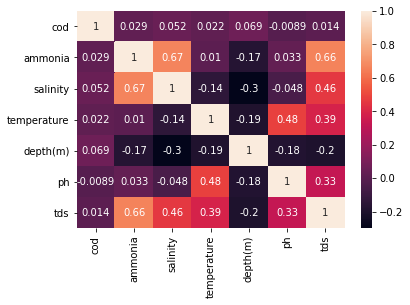

In [105]:
sns.heatmap(df.corr(),annot=True)

In [125]:
features = df[['cod','ammonia', 'salinity', 'temperature', 'depth(m)', 'ph', 'tds']]
target = df['fish_species']
fish_species = df['fish_species']

In [126]:
#Train Data Test Data Spliting
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [169]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
acc = []
model = []
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Trees's Accuracy is: ", x*100)
print("\n")
print(classification_report(Ytest,predicted_values))
print("\n")
print("Confusion Matrix on Test Data")
pd.crosstab(Ytest, predicted_values, rownames=['True'], colnames=['Predicted'], margins=True)

Decision Trees's Accuracy is:  97.08171206225681


                             precision    recall  f1-score   support

        Bowal(Wallago attu)       1.00      1.00      1.00        52
        Catla (Catla catla)       1.00      1.00      1.00        81
    Koi(Anabas testudineus)       1.00      1.00      1.00        67
   Nilontika (O. niloticus)       0.82      0.92      0.87        49
Pangas(Pangasius pangasius)       1.00      0.97      0.99        37
    Puthi(Cyprinus sophore)       1.00      1.00      1.00        42
         Rui (Labeo rohita)       1.00      1.00      1.00        24
      Shing(Heteropneustes)       1.00      1.00      1.00        92
Shrimp(Decapod crustaceans)       1.00      1.00      1.00        37
  Telapia (Tilapiarendalli)       0.82      0.70      0.75        33

                   accuracy                           0.97       514
                  macro avg       0.96      0.96      0.96       514
               weighted avg       0.97      0.97  

Predicted,Bowal(Wallago attu),Catla (Catla catla),Koi(Anabas testudineus),Nilontika (O. niloticus),Pangas(Pangasius pangasius),Puthi(Cyprinus sophore),Rui (Labeo rohita),Shing(Heteropneustes),Shrimp(Decapod crustaceans),Telapia (Tilapiarendalli),All
True,,,,,,,,,,,
Bowal(Wallago attu),52,0,0,0,0,0,0,0,0,0,52
Catla (Catla catla),0,81,0,0,0,0,0,0,0,0,81
Koi(Anabas testudineus),0,0,67,0,0,0,0,0,0,0,67
Nilontika (O. niloticus),0,0,0,45,0,0,0,0,0,4,49
Pangas(Pangasius pangasius),0,0,0,0,36,0,0,0,0,1,37
Puthi(Cyprinus sophore),0,0,0,0,0,42,0,0,0,0,42
Rui (Labeo rohita),0,0,0,0,0,0,24,0,0,0,24
Shing(Heteropneustes),0,0,0,0,0,0,0,92,0,0,92
Shrimp(Decapod crustaceans),0,0,0,0,0,0,0,0,37,0,37


In [134]:
#Decision tree pickle file for web 
import pickle
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [175]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)
print("\n")
print(classification_report(Ytest,predicted_values))
print("\n")
print("Confusion Matrix on Test Data")
pd.crosstab(Ytest, predicted_values, rownames=['True'], colnames=['Predicted'], margins=True)

Naive Bayes's Accuracy is:  96.10894941634241


                             precision    recall  f1-score   support

        Bowal(Wallago attu)       1.00      1.00      1.00        52
        Catla (Catla catla)       1.00      1.00      1.00        81
    Koi(Anabas testudineus)       1.00      1.00      1.00        67
   Nilontika (O. niloticus)       0.73      1.00      0.84        49
Pangas(Pangasius pangasius)       1.00      1.00      1.00        37
    Puthi(Cyprinus sophore)       1.00      1.00      1.00        42
         Rui (Labeo rohita)       1.00      1.00      1.00        24
      Shing(Heteropneustes)       0.99      0.99      0.99        92
Shrimp(Decapod crustaceans)       1.00      1.00      1.00        37
  Telapia (Tilapiarendalli)       0.93      0.42      0.58        33

                   accuracy                           0.96       514
                  macro avg       0.97      0.94      0.94       514
               weighted avg       0.97      0.96     

Predicted,Bowal(Wallago attu),Catla (Catla catla),Koi(Anabas testudineus),Nilontika (O. niloticus),Pangas(Pangasius pangasius),Puthi(Cyprinus sophore),Rui (Labeo rohita),Shing(Heteropneustes),Shrimp(Decapod crustaceans),Telapia (Tilapiarendalli),All
True,,,,,,,,,,,
Bowal(Wallago attu),52,0,0,0,0,0,0,0,0,0,52
Catla (Catla catla),0,81,0,0,0,0,0,0,0,0,81
Koi(Anabas testudineus),0,0,67,0,0,0,0,0,0,0,67
Nilontika (O. niloticus),0,0,0,49,0,0,0,0,0,0,49
Pangas(Pangasius pangasius),0,0,0,0,37,0,0,0,0,0,37
Puthi(Cyprinus sophore),0,0,0,0,0,42,0,0,0,0,42
Rui (Labeo rohita),0,0,0,0,0,0,24,0,0,0,24
Shing(Heteropneustes),0,0,0,0,0,0,0,91,0,1,92
Shrimp(Decapod crustaceans),0,0,0,0,0,0,0,0,37,0,37


In [156]:
import pickle
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [176]:
#Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(gamma='auto')
SVM.fit(Xtrain,Ytrain)
predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)
print("\n")
print(classification_report(Ytest,predicted_values))
print("\n")
print("Confusion Matrix on Test Data")
pd.crosstab(Ytest, predicted_values, rownames=['True'], colnames=['Predicted'], margins=True)

SVM's Accuracy is:  98.63813229571986


                             precision    recall  f1-score   support

        Bowal(Wallago attu)       1.00      1.00      1.00        52
        Catla (Catla catla)       0.96      1.00      0.98        81
    Koi(Anabas testudineus)       1.00      1.00      1.00        67
   Nilontika (O. niloticus)       0.94      1.00      0.97        49
Pangas(Pangasius pangasius)       1.00      0.97      0.99        37
    Puthi(Cyprinus sophore)       1.00      1.00      1.00        42
         Rui (Labeo rohita)       1.00      0.96      0.98        24
      Shing(Heteropneustes)       0.99      1.00      0.99        92
Shrimp(Decapod crustaceans)       1.00      0.97      0.99        37
  Telapia (Tilapiarendalli)       1.00      0.88      0.94        33

                   accuracy                           0.99       514
                  macro avg       0.99      0.98      0.98       514
               weighted avg       0.99      0.99      0.99   

Predicted,Bowal(Wallago attu),Catla (Catla catla),Koi(Anabas testudineus),Nilontika (O. niloticus),Pangas(Pangasius pangasius),Puthi(Cyprinus sophore),Rui (Labeo rohita),Shing(Heteropneustes),Shrimp(Decapod crustaceans),Telapia (Tilapiarendalli),All
True,,,,,,,,,,,
Bowal(Wallago attu),52,0,0,0,0,0,0,0,0,0,52
Catla (Catla catla),0,81,0,0,0,0,0,0,0,0,81
Koi(Anabas testudineus),0,0,67,0,0,0,0,0,0,0,67
Nilontika (O. niloticus),0,0,0,49,0,0,0,0,0,0,49
Pangas(Pangasius pangasius),0,1,0,0,36,0,0,0,0,0,37
Puthi(Cyprinus sophore),0,0,0,0,0,42,0,0,0,0,42
Rui (Labeo rohita),0,1,0,0,0,0,23,0,0,0,24
Shing(Heteropneustes),0,0,0,0,0,0,0,92,0,0,92
Shrimp(Decapod crustaceans),0,1,0,0,0,0,0,0,36,0,37


In [140]:
import pickle
SVM_pkl_filename = 'SVM.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

In [177]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)
print("\n")
print(classification_report(Ytest,predicted_values))
print("\n")
print("Confusion Matrix on Test Data")
pd.crosstab(Ytest, predicted_values, rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression's Accuracy is:  85.21400778210116


                             precision    recall  f1-score   support

        Bowal(Wallago attu)       0.94      0.88      0.91        52
        Catla (Catla catla)       0.91      0.98      0.94        81
    Koi(Anabas testudineus)       1.00      1.00      1.00        67
   Nilontika (O. niloticus)       0.47      0.33      0.39        49
Pangas(Pangasius pangasius)       0.80      0.86      0.83        37
    Puthi(Cyprinus sophore)       0.98      0.98      0.98        42
         Rui (Labeo rohita)       0.78      0.75      0.77        24
      Shing(Heteropneustes)       0.82      0.97      0.89        92
Shrimp(Decapod crustaceans)       1.00      1.00      1.00        37
  Telapia (Tilapiarendalli)       0.50      0.39      0.44        33

                   accuracy                           0.85       514
                  macro avg       0.82      0.81      0.81       514
               weighted avg       0.84      0

Predicted,Bowal(Wallago attu),Catla (Catla catla),Koi(Anabas testudineus),Nilontika (O. niloticus),Pangas(Pangasius pangasius),Puthi(Cyprinus sophore),Rui (Labeo rohita),Shing(Heteropneustes),Shrimp(Decapod crustaceans),Telapia (Tilapiarendalli),All
True,,,,,,,,,,,
Bowal(Wallago attu),46,6,0,0,0,0,0,0,0,0,52
Catla (Catla catla),0,79,0,0,1,0,1,0,0,0,81
Koi(Anabas testudineus),0,0,67,0,0,0,0,0,0,0,67
Nilontika (O. niloticus),0,0,0,16,6,0,2,15,0,10,49
Pangas(Pangasius pangasius),0,0,0,5,32,0,0,0,0,0,37
Puthi(Cyprinus sophore),0,0,0,0,0,41,1,0,0,0,42
Rui (Labeo rohita),3,2,0,0,0,1,18,0,0,0,24
Shing(Heteropneustes),0,0,0,0,0,0,0,89,0,3,92
Shrimp(Decapod crustaceans),0,0,0,0,0,0,0,0,37,0,37


In [151]:
import pickle
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

In [178]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)
print("\n")
print(classification_report(Ytest,predicted_values))
print("\n")
print("Confusion Matrix on Test Data")
pd.crosstab(Ytest, predicted_values, rownames=['True'], colnames=['Predicted'], margins=True)

RF's Accuracy is:  99.80544747081711


                             precision    recall  f1-score   support

        Bowal(Wallago attu)       1.00      1.00      1.00        52
        Catla (Catla catla)       1.00      1.00      1.00        81
    Koi(Anabas testudineus)       1.00      1.00      1.00        67
   Nilontika (O. niloticus)       1.00      1.00      1.00        49
Pangas(Pangasius pangasius)       1.00      1.00      1.00        37
    Puthi(Cyprinus sophore)       1.00      1.00      1.00        42
         Rui (Labeo rohita)       1.00      1.00      1.00        24
      Shing(Heteropneustes)       0.99      1.00      0.99        92
Shrimp(Decapod crustaceans)       1.00      1.00      1.00        37
  Telapia (Tilapiarendalli)       1.00      0.97      0.98        33

                   accuracy                           1.00       514
                  macro avg       1.00      1.00      1.00       514
               weighted avg       1.00      1.00      1.00    

Predicted,Bowal(Wallago attu),Catla (Catla catla),Koi(Anabas testudineus),Nilontika (O. niloticus),Pangas(Pangasius pangasius),Puthi(Cyprinus sophore),Rui (Labeo rohita),Shing(Heteropneustes),Shrimp(Decapod crustaceans),Telapia (Tilapiarendalli),All
True,,,,,,,,,,,
Bowal(Wallago attu),52,0,0,0,0,0,0,0,0,0,52
Catla (Catla catla),0,81,0,0,0,0,0,0,0,0,81
Koi(Anabas testudineus),0,0,67,0,0,0,0,0,0,0,67
Nilontika (O. niloticus),0,0,0,49,0,0,0,0,0,0,49
Pangas(Pangasius pangasius),0,0,0,0,37,0,0,0,0,0,37
Puthi(Cyprinus sophore),0,0,0,0,0,42,0,0,0,0,42
Rui (Labeo rohita),0,0,0,0,0,0,24,0,0,0,24
Shing(Heteropneustes),0,0,0,0,0,0,0,92,0,0,92
Shrimp(Decapod crustaceans),0,0,0,0,0,0,0,0,37,0,37


In [179]:
import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

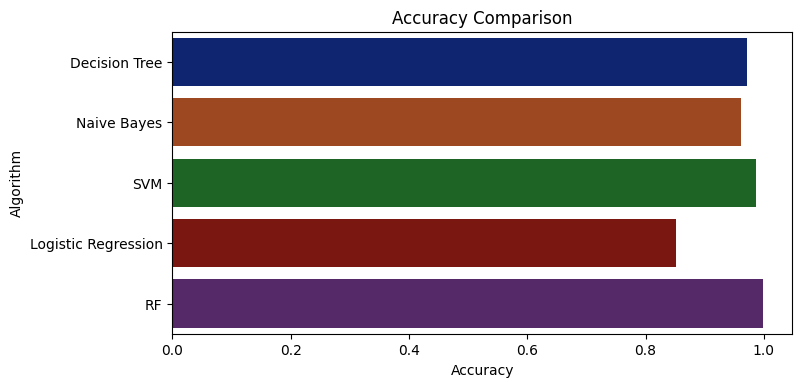

In [180]:
plt.figure(figsize=[8,4],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [182]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 97.08171206225681
Naive Bayes --> 96.10894941634241
SVM --> 98.63813229571986
Logistic Regression --> 85.21400778210116
RF --> 99.80544747081711


In [174]:
data = np.array([[4.5, 3, 10.5, 29.5, 2.8, 7.23, 430]])
prediction = RF.predict(data)
print(prediction)

['Telapia (Tilapiarendalli)']


In [183]:
data = np.array([[6, 2.9, 10.5, 22.5, 3, 6.25, 320]])
prediction = RF.predict(data)
print(prediction)

['Nilontika (O. niloticus)']


In [184]:
data = np.array([[4, 2, 14, 25, 2, 6.75, 200]])
prediction = RF.predict(data)
print(prediction)

['Shrimp(Decapod crustaceans)']
